In [6]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("/content/car_data.csv")

In [8]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


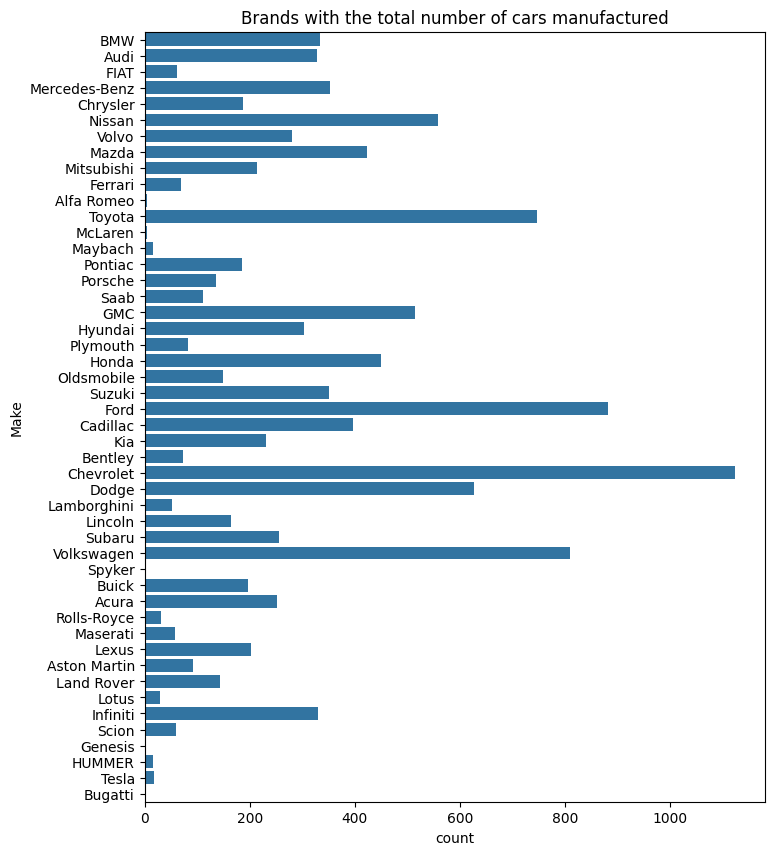

In [12]:
#analysing the total number of cars manufactured by each brand

data['Make'].unique()
data['Make'].value_counts()

plt.figure(figsize=(8,10))
sns.countplot(y=data.Make)
plt.title("Brands with the total number of cars manufactured")
plt.show()

In [13]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

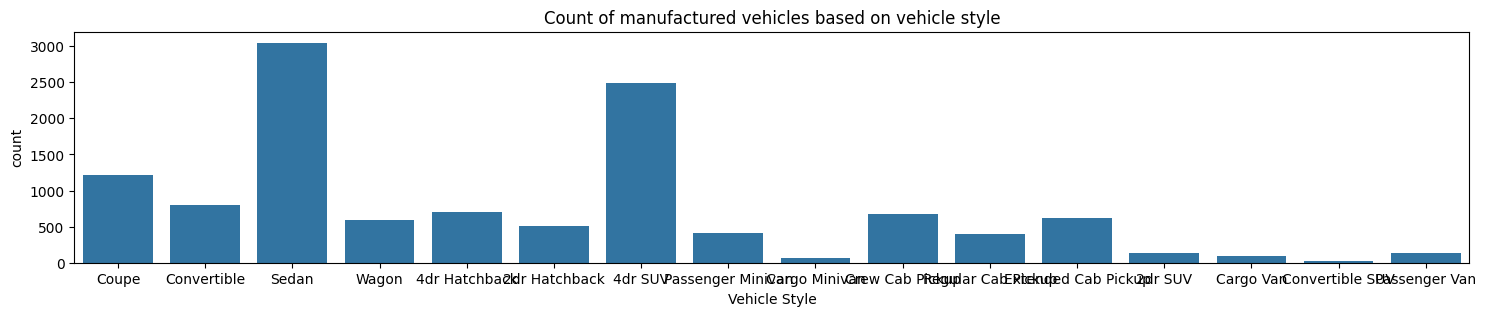

In [18]:
#analysis of number of cars manufactured based on vehicle style

plt.figure(figsize=(18,3))
sns.countplot(x='Vehicle Style',data=data)
plt.title("Count of manufactured vehicles based on vehicle style")
plt.show()

Since ML Algos. dont understand categorical data, it becomes important for us to convert the categorical data into numeric and to do this we have the following techniques:

- Label Encoding
- One-Hot Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [20]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [21]:
data['Vehicle Style']=label_encoder.fit_transform(data['Vehicle Style'])

In [22]:
data['Vehicle Style'].unique()

array([ 8,  6, 14, 15,  2,  0,  3, 11,  4,  9, 13, 10,  1,  5,  7, 12])

In [23]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [24]:
data['Engine Fuel Type']=label_encoder.fit_transform(data['Engine Fuel Type'])

In [25]:
data['Engine Fuel Type'].unique()

array([ 8,  9,  7,  4,  0,  1,  2,  6,  3,  5, 10])

In [26]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [27]:
data['Vehicle Size']=label_encoder.fit_transform(data['Vehicle Size'])

In [28]:
data['Vehicle Size'].unique()

array([0, 2, 1])

In [29]:
data['Make']=label_encoder.fit_transform(data['Make'])

In [30]:
data['Model']=label_encoder.fit_transform(data['Model'])

In [31]:
data['Driven_Wheels']=label_encoder.fit_transform(data['Driven_Wheels'])

In [32]:
data['Transmission Type']=label_encoder.fit_transform(data['Transmission Type'])

In [34]:
data['Market Category']=label_encoder.fit_transform(data['Market Category'])

In [35]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,34500


In [36]:
data.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,0


In [37]:
#imputing the missing values from columns with mode of the respective column
data['Engine HP']=data['Engine HP'].fillna(data['Engine HP'].mode()[0])
data['Engine Cylinders']=data['Engine Cylinders'].fillna(data['Engine Cylinders'].mode()[0])
data['Number of Doors']=data['Number of Doors'].fillna(data['Number of Doors'].mode()[0])

In [38]:
data.isna().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,0


In [39]:
#dividing the data into dependent (y) and independent variables (x)
x=data.drop(['MSRP'],axis=1) #since MSRP is our target variable, we are excluding it from 'x'
x.head() #independent features

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916


In [40]:
y=data['MSRP'] #dependent features

In [54]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75) #75% of the dataset will be used for training and rest 15% will be used for testing

In [55]:
#using Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [56]:
model.fit(x_train,y_train) #training (learning) of the ML model takes place

LinearRegression()

In [57]:
predictions=model.predict(x_test)

In [58]:
#checking the overall accuracy of the model to validate the performance
from sklearn.metrics import r2_score
score=r2_score(y_test,predictions)

In [59]:
print(score)

0.5856500867020262
